**Sentiment analysis for product reviews**

Sentiment analysis extracts opinions and emotions from text, helping businesses understand customer feedback. In this project, i will build a sentiment classifier that categorizes product reviews as positive or negative using a simple Logistic Regression model with TF-IDF features on real-world review data.


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# For demo purposes, we'll generate a small dataset manually
data = {
    'review': [
        "Absolutely love this product! Works perfectly.",
        "Worst purchase I've ever made. Do not recommend.",
        "Pretty decent quality for the price.",
        "It broke after one use. Terrible quality.",
        "Great value for money. Very satisfied!",
        "The item never arrived. Bad experience.",
        "Highly recommend! Exceeded my expectations.",
        "It was okay, nothing special.",
        "Cheap material, not worth it.",
        "Fantastic product! Will buy again."
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'negative', 'positive', 'negative', 'positive', 'neutral', 'negative', 'positive']
}



In [ ]:
# Turn the dictionary to a dataframe
df = pd.DataFrame(data)


df

,review,sentiment
0,This is a great product!,positive
1,This is a bad product.,negative
2,It is okay.,neutral


In [ ]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["sentiment"], test_size=0.3, random_state=42)

# Text preprocessing with TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)






In [ ]:
#X_train_vec
#X_test_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 6)>

In [ ]:
# Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test_vec)
print("Classification Report: ")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Classification Report: 
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

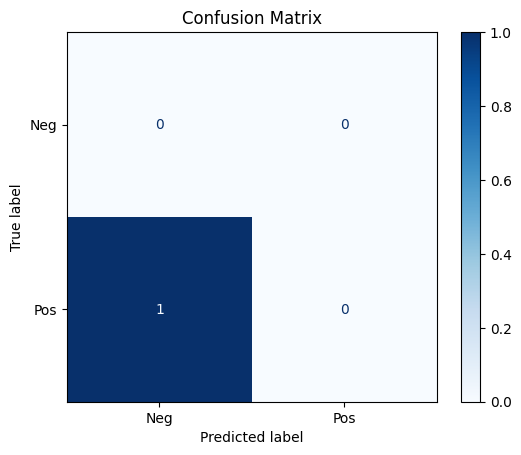

In [ ]:
# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test, display_labels=["Neg", "Pos"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Text classification for news categorization**

News categorization is a classic NLP task where articles are classified into topics like sports, politics, tech, or business. In this project, i will implement a multiclass text classifier using 20 newsgroup dataset with a TF-IDF vectorizer and Multinomial Naive Bayes classifier.

A multiclass classification is having more than two possible categories(classes) unlike binary classification which is just two.

A multilabel classification is when there are multiple possible classes but one example can belong to more than one class at the same time.

A multinomial Naive Bayes classifier is a ml method used to classify text.it looks at the number of times each word appears in a document and uses that to predict which category the text belongs to.



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
categories = ['rec.sport.baseball', 'sci.med', 'comp.graphics', 'talk.politics.mideast']

newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))


In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer  = TfidfVectorizer(stop_words='english',max_df=0.5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test_vec)


print("Classification Report: ")
print(classification_report(y_test, y_pred, target_names=categories))

Classification Report: 
                       precision    recall  f1-score   support

   rec.sport.baseball       0.96      0.92      0.94       196
              sci.med       0.86      0.97      0.91       197
        comp.graphics       0.94      0.91      0.92       193
talk.politics.mideast       0.96      0.90      0.93       194

             accuracy                           0.93       780
            macro avg       0.93      0.93      0.93       780
         weighted avg       0.93      0.93      0.93       780



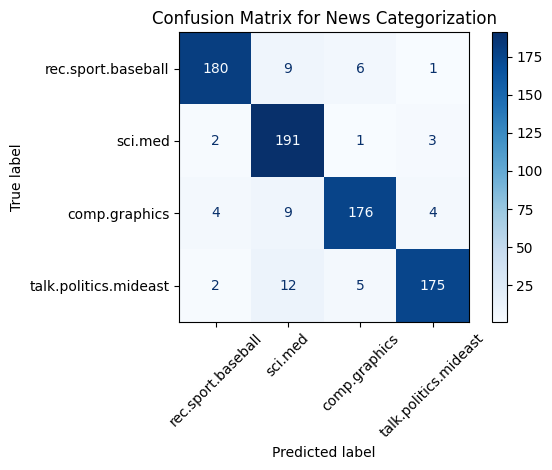

In [ ]:
# Visualize confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test, display_labels=categories, cmap='Blues')
plt.xticks(rotation=45)
plt.title("Confusion Matrix for News Categorization")
plt.tight_layout()
plt.show()

**Named entity recognition for news articles**

Named Entity Recognition(NER) identifies and classifies entities like people, organizations, locations, dates etc. in text. In this project, i will apply pretrained NER models (like SpaCy's) to extract structured information from unstructured news article content.


In [ ]:
!pip install spacy

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Load SpaCy English NER model
# This is a pretrained langauge model, spaCy has several models like sm(small) like the one we loaded, md(medium), and lg(large)
nlp =  spacy.load("en_core_web_sm")



In [ ]:
# Sample news article text (can replace with real scraped data)
news_article = """
Apple Inc. is planning to open a new office in London by the end of 2025.
According to CEO Tim Cook, the expansion is aimed at boosting their presence in Europe.
The announcement was made during the London Tech Week.
"""


In [ ]:
# Process text with SpaCy NER
doc = nlp(news_article)
doc


Apple Inc. is planning to open a new office in London by the end of 2025. 
According to CEO Tim Cook, the expansion is aimed at boosting their presence in Europe. 
The announcement was made during the London Tech Week.

In [ ]:
# Extract named entities
print("Named Entities Found: ")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

Named Entities Found: 
Apple Inc. (ORG)
London (GPE)
the end of 2025 (DATE)
Tim Cook (PERSON)
Europe (LOC)
the London Tech Week (ORG)


In [ ]:
# Optional: visualize entity labels(word cloud)
labels = [ent.label_ for ent in doc.ents]
label_freq = Counter(labels)
wc = WordCloud(background_color='white').generate_from_frequencies(label_freq)


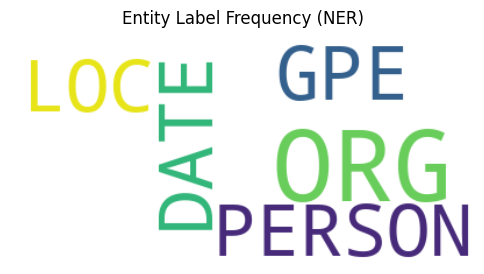

In [ ]:
plt.figure(figsize=(6, 4))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Entity Label Frequency (NER)")
plt.show()

**Part-of-speech tagger implementation**

Part-of-Speech tagging assigns grammatical categories (like noun, verb, adjective) to each word in a sentence. This is a foundational NLP task for syntactic parsing -( a process of analyzing  a sentence's grammatical structure), information extraction, and language modelling. i will implement a POS tagger using a pretrained SpaCy model to analyze ENglish sentences.


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Example sentence or paragraph
text = "The quick brown fox jumps over the lazy dog near the riverbank."

In [ ]:
# Process the text
doc = nlp(text)

# Print each token with its POS tag and detailed tag
print("🧠 Part-of-Speech Tagging:")
print(f"{'Token':<15} {'POS':<10} {'Tag':<10} {'Explanation'}")
print("-" * 60)
for token in doc:
    print(f"{token.text:<15} {token.pos_:<10} {token.tag_:<10} {spacy.explain(token.tag_)}")

🧠 Part-of-Speech Tagging:
Token           POS        Tag        Explanation
------------------------------------------------------------
The             DET        DT         determiner
quick           ADJ        JJ         adjective (English), other noun-modifier (Chinese)
brown           ADJ        JJ         adjective (English), other noun-modifier (Chinese)
fox             NOUN       NN         noun, singular or mass
jumps           VERB       VBZ        verb, 3rd person singular present
over            ADP        IN         conjunction, subordinating or preposition
the             DET        DT         determiner
lazy            ADJ        JJ         adjective (English), other noun-modifier (Chinese)
dog             NOUN       NN         noun, singular or mass
near            ADP        IN         conjunction, subordinating or preposition
the             DET        DT         determiner
riverbank       NOUN       NN         noun, singular or mass
.               PUNCT      .      

**Word embeddings from scratch**

Word embeddings represent words as dense vectors taht capture semantic realtionships, enabling machines to understand langauge contextually as in understand what a word really means in a given situation like humans do.
In this project, i will implement word2vec Skip-gram model from scratch using pytorch to learn embeddings from a small text corpus.

In [1]:
!pip install nltk

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import nltk
import random
import numpy as np

In [5]:
nltk.download("punkt")
nltk.download("punkt_tab") # Download the missing resource

# Sample Corpus
corpus = "The quick brown fox jumps over the lazy dog. The dog barked at the fox"

# Prepocess text
words = nltk.word_tokenize(corpus.lower())
vocab = list(set(words))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
# Generate training data: (target, context) pairs using window size
window_size = 2
data = []

for i, target in enumerate(words):
    for j in range(-window_size, window_size + 1):
        if j == 0 or i + j < 0 or i + j >= len(words):
            continue
        context = words[i + j]
        data.append((word2idx[target], word2idx[context]))


In [15]:
# Define Skip-gram model
class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.out = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.out(x)
        return x

In [16]:
# Hyperparameters
embedding_dim = 10
vocab_size = len(vocab)
model = SkipGramModel(vocab_size, embedding_dim)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training the loop
for epoch in range(200):
    total_loss = 0
    for target, context in data:
        target_tensor = torch.tensor([target])
        context_tensor = torch.tensor([context])


        output = model(target_tensor)
        loss = loss_fn(output, context_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

Epoch 0, Loss: 144.5025
Epoch 50, Loss: 95.6988
Epoch 100, Loss: 95.1477
Epoch 150, Loss: 94.9535


In [18]:
# Show word embeddngs
print("Word embedding: ")
for word in ["dog", "fox", "the", "lazy"]:
    idx = word2idx[word]
    embed = model.embedding.weight[idx].detach().numpy()
    print(f"{word}: {embed}")

Word embedding: 
dog: [ 0.6985419   0.40115982  2.2995434   0.2041102   1.5669304  -1.4102165
 -0.38532782  0.46204123 -0.78597     0.40766495]
fox: [-0.58740425  0.8014942  -0.46056375  0.81535035 -0.3343534   0.6444257
 -0.99662435 -2.3636296  -0.31410998 -0.36849347]
the: [ 0.08449897  0.12542674 -0.7952977   0.05568285 -1.1623287  -0.52622277
  0.43393537  0.3588051  -0.18909854  0.09464844]
lazy: [ 0.47588944  1.4642136   0.07575938 -2.9224145   0.917306   -0.4310925
 -1.0057402  -0.05962909  3.1426055  -0.34602147]


**Text summarization using extractive methods**

Extractive summariation selects key sentences from the orignal text to build a concise summary. Concise summary is keeing the main points and removing unnecessary details. This projet implements extractive summarizatio using TF-IDF-based sentence scoring and cosine similarity, ranking the most relevant sentences to form a summary.


In [19]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
# Sample text for summarization
text = """
Artificial Intelligence (AI) is transforming industries worldwide.
It is being used in healthcare to detect diseases early, in finance to prevent fraud,
and in manufacturing to optimize supply chains. AI-powered assistants are now part of daily life.
Despite its promise, AI raises ethical concerns like bias and job displacement.
As AI evolves, regulations and responsible development become crucial.
"""

In [26]:
# Step1: Split text into sentences
sentences =  sent_tokenize(text)

# Step 2: Vectorize sentences using TF-IDF
vectorizer = TfidfVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)

# Step 3: Compute similarity matrix
similarity_matrix = cosine_similarity(sentence_vectors)

# Step 4: Rank sentences using similarity scores
scores = similarity_matrix.sum(axis=1)

# Step 5: Select top-N sentences as summary
N = 3
# Ensure N does not exceed the number of sentences
if N > len(sentences):
    N = len(sentences)

top_sentence_indices = np.argsort(scores)[-N:][::-1] # corrected indexing
summary = [sentences[i] for i in sorted(top_sentence_indices)]

print("Summary:")
for sentence in summary:
    print(sentence)

Summary:

Artificial Intelligence (AI) is transforming industries worldwide.
Despite its promise, AI raises ethical concerns like bias and job displacement.
As AI evolves, regulations and responsible development become crucial.


In [27]:
# Final output
print("Extractive Summary:\n")
for sent in summary:
    print("- " + sent)

Extractive Summary:

- 
Artificial Intelligence (AI) is transforming industries worldwide.
- Despite its promise, AI raises ethical concerns like bias and job displacement.
- As AI evolves, regulations and responsible development become crucial.


**Topic Modelling with LDA**

Topic modelling automatically discovers abstract topics within a collection of documents. In this project, i will implement LDA(Latent Dirichlet Allocation) using Gensim, which groups words into topics based on co-occurence patterns-ideal for summarizing large text corpora like news, research papers, or reviews.

In [ ]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

In [ ]:
# Sample corpus (can be replaced with real documents)
documents = [
    "Artificial Intelligence is transforming business and healthcare.",
    "Machine learning and deep learning are subfields of AI.",
    "Hospitals use AI to predict patient conditions.",
    "Stock market prediction is a hot topic in finance using ML.",
    "AI ethics and bias are growing concerns in technology."
]

In [ ]:
# Preprocessing
stop_words = set(stopwords.words("english"))
processed_docs = []

for doc in documents:
    tokens = word_tokenize(doc.lower())
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
    processed_docs.append(filtered)


# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs ]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=3,
                                   random_state=42,
                                   passes=15,
                                   alpha='auto',
                                   per_word_topics=True)


# Print Topics
print("Top Topics Discovered")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic # {idx+1}: {topic}")

**Document similarity calculator**

A document similarity Calculator measures how similar two or more documents are using vector representations. In thsi project, we use TF-IDF vectorization and cosine similaroty to compute the similarity score between multiple text documents, which is useful for plagiarism detection, duplicate detection and  clustering tasks.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [30]:
# Sample documents (can be articles, paragraphs, etc.)
documents = [
    "AI is changing the world through automation and innovation.",
    "Artificial Intelligence and automation are reshaping industries.",
    "The global economy is impacted by inflation and interest rates.",
    "Machine learning techniques are a part of AI advancements."
]


In [32]:
# Convert documents into TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)


# Compute cosine similarity between documents
similarity_matrix = cosine_similarity(tfidf_matrix)




In [37]:
# Display similarity matrix
print("Document similarity matrix (Cosine): \n")
for i in range(len(documents)):
     for j in range(len(documents)):
        print(f"Doc {i+1} vs Doc {j+1}: {similarity_matrix[i][j]:.2f}")
     print("-" * 40)

Document similarity matrix (Cosine): 

Doc 1 vs Doc 1: 1.00
Doc 1 vs Doc 2: 0.14
Doc 1 vs Doc 3: 0.00
Doc 1 vs Doc 4: 0.14
----------------------------------------
Doc 2 vs Doc 1: 0.14
Doc 2 vs Doc 2: 1.00
Doc 2 vs Doc 3: 0.00
Doc 2 vs Doc 4: 0.00
----------------------------------------
Doc 3 vs Doc 1: 0.00
Doc 3 vs Doc 2: 0.00
Doc 3 vs Doc 3: 1.00
Doc 3 vs Doc 4: 0.00
----------------------------------------
Doc 4 vs Doc 1: 0.14
Doc 4 vs Doc 2: 0.00
Doc 4 vs Doc 3: 0.00
Doc 4 vs Doc 4: 1.00
----------------------------------------


In [39]:
# Find most similar pair
def most_similar(sim_matrix):
    max_score = 0
    pair = (0, 0)
    for i in range(len(sim_matrix)):
        for j in range(i + 1, len(sim_matrix)):
            if sim_matrix[i][j] > max_score:
              max_score = sim_matrix[i][j]
              pair = (i , j)
    return pair, max_score

pair, score = most_similar(similarity_matrix)
print(f"Most similar Docs: Doc {pair[0]+1} and Doc{pair[1]+1} -> Similarity Score: {score:.2f}")

Most similar Docs: Doc 1 and Doc 2 -> Similarity Score: 0.14
